THis notebook explores the usage of random forest for phishing detection

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('dataset/CEAS_08.csv')
df

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


Cleaning Dataset

In [4]:
df = df.dropna()
df = df.reset_index(drop =True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38669 entries, 0 to 38668
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    38669 non-null  object
 1   receiver  38669 non-null  object
 2   date      38669 non-null  object
 3   subject   38669 non-null  object
 4   body      38669 non-null  object
 5   label     38669 non-null  int64 
 6   urls      38669 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.1+ MB
None


subject based detection

In [5]:
#use this block to predict phishing subject based

body based detection

In [6]:
#use this block to predict using body based

sender based

In [7]:
#use this to predict using sender (maybe reciver also)

body, sender, subject based detection

In [ ]:
#use this to take into context subject body and sender 
df['combined_text'] = (
    df['subject'].fillna('') + ' ' +
    df['body'].fillna('') + ' ' +
    df['sender'].fillna('')
)

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['combined_text'])


y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_all = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,            
    min_samples_split=5,   
    min_samples_leaf=3,      
    max_features='sqrt',     
    bootstrap=True,         
    random_state=42,
    n_jobs=-1
)
rf_all.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_all.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

training vs Testing Accuracy
Training Accuracy: 0.9802
Testing Accuracy:  0.9796
 
check for overfitting


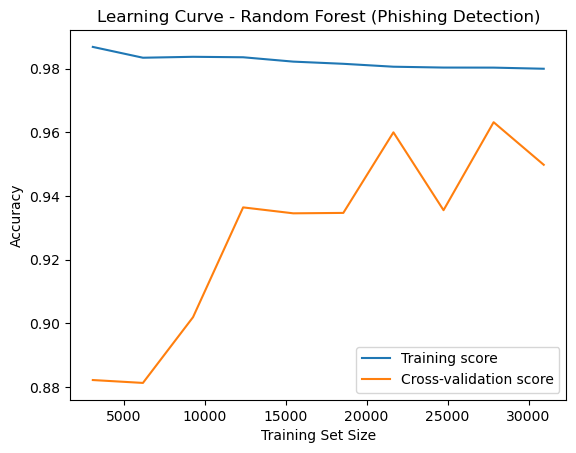

 
cross validation
Cross-validation scores: [0.97401086 0.98138092 0.97737264 0.97284717 0.84249321]
Mean CV accuracy: 0.9496209592244871


In [13]:
print("training vs Testing Accuracy")
train_pred = rf_all.predict(X_train)
test_pred = rf_all.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(" ")
print("check for overfitting")
train_sizes, train_scores, test_scores = learning_curve(
    rf_all, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve - Random Forest (Phishing Detection)')
plt.show()
print(" ")
print("cross validation")
cv_scores = cross_val_score(rf_all, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

use fuzzy rules to take into context the individual models for subject body and sender and combine them into one fuzzy logic based model to predict phishing emails